In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [3]:
storage = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    loc_dev_ddm =  ul.interpnan(df["loc_dev_ddm"][idx1-20:idx2+20])
    loc_dev_ddm = loc_dev_ddm.loc[idx1:idx2].to_numpy() 
    storage[file] = loc_dev_ddm
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\loc_dev_ddm.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


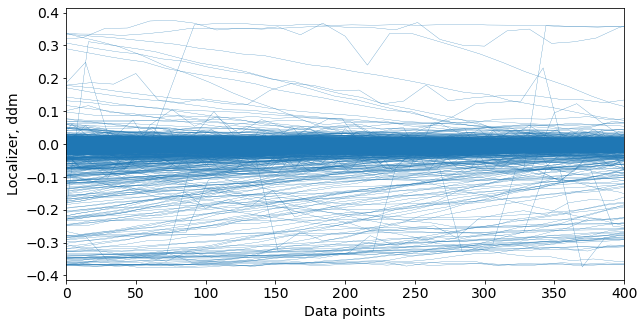

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\loc_dev_ddm.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy(), '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Localizer, ddm", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\loc_dev_ddm.png")

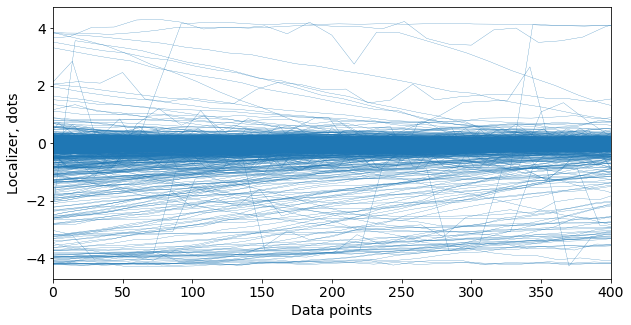

In [3]:
ddm_to_dot = 1/0.0875
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\loc_dev_ddm.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy() * ddm_to_dot, '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Localizer, dots", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\loc_dev_dots.png")

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\loc_dev_ddm.csv")
counter, sampling, duration = 0, 16, 5
max_loc_dev_dot = 1
ddm_to_dot = 1.0 / 0.0875
loc_dev_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    loc_dev_dot = df[file].to_numpy() * ddm_to_dot
    for irow, _ in enumerate(loc_dev_dot):
        if irow >= loc_dev_dot.shape[0] - sampling * duration:
            loc_dev_flag.append(0)
            break
        else:
            flag = abs(loc_dev_dot[irow:irow + sampling * duration]) > max_loc_dev_dot
            if sum(flag) >= sampling * duration:
                loc_dev_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["loc_dev"] = loc_dev_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

   8 ... flight_10164 ... Unstable
   9 ... flight_10166 ... Unstable
  15 ... flight_10331 ... Unstable
  22 ... flight_10373 ... Unstable
  33 ... flight_10445 ... Unstable
  56 ... flight_10814 ... Unstable
  99 ... flight_11417 ... Unstable
 131 ... flight_11707 ... Unstable
 133 ... flight_11725 ... Unstable
 230 ... flight_13550 ... Unstable
 237 ... flight_13661 ... Unstable
 276 ... flight_14309 ... Unstable
 326 ... flight_15080 ... Unstable
 336 ... flight_15170 ... Unstable
 387 ... flight_15739 ... Unstable
 389 ... flight_15743 ... Unstable
 435 ... flight_16626 ... Unstable
 438 ... flight_16697 ... Unstable
 459 ... flight_16927 ... Unstable
 465 ... flight_17005 ... Unstable
 488 ... flight_17317 ... Unstable
 499 ... flight_17663 ... Unstable
 582 ... flight_18779 ... Unstable
 616 ... flight_19100 ... Unstable
 620 ... flight_19108 ... Unstable
 626 ... flight_19178 ... Unstable
 628 ... flight_19196 ... Unstable
 665 ... flight_19678 ... Unstable
 670 ... flight_1969

In [3]:
counter

127